In [6]:
!pip install tweepy
!pip install pycountry
!pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993196 sha256=9ad27f75de6703f3a001d21df147329a3efac2423e4e2862e8b7d784a7f6fdb1
  Stored in directory: c:\users\emreo\appdata\local\pip\cache\wheels\59\f6\9d\85068904dba861c0b9af74e286265a08da438748ee5ae56067
Successfully built langdetect


In [50]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
# Authentication
consumerKey = "6M56zHv8QFXpTZRn5qRNaaarB"
consumerSecret = "zGZFvm5ZdsjgmkrinBtYn3yA5MExDPuUIB4g0PRxYvtDw5dxRr" #APISecret
bearerToken="AAAAAAAAAAAAAAAAAAAAAPCGHwEAAAAAVYMZ0KVPhEa18rWYzFj9x%2BE0rT0%3DNY6FrLsaVqaPZD7mDdnKD3fDafT0pvCXbHhmcdkXDFuEo9xcv4"
accessToken = "86549830-ZNM1VbSUmH7WfhUAnBwkUSaDNFVow5lBZF8PsfTKR"
accessTokenSecret = "5jFB0DG1TzqUJo8T3Kx6wp1m0UfOkLfNa4MR3QRFn58IN"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [52]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: @TMobileHelp
Please enter how many tweets to analyze: 2500


In [53]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
#tweet_list.drop_duplicates(inplace = True) #TWEET_LIST2 ?????
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  1003
negative number:  506
neutral number:  991


In [54]:
tweet_list.to_csv()

',0\r\n0,@TMobileHelp I sent you like 5 DMs and you are ghosting me!  What do I look like a professional athlete trying to talk to @miakhalifa\r\n1,@TMobileHelp @Mike_Katz No i have verizon not t-mobile haha\r\n2,@CallieField @TMobileHelp Thank you all for stepping up and in - finally got everything set. It was a doozy and… https://t.co/bgtazvBoB6\r\n3,. @TMobile @TMobileHelp @spint what a terrible weekend dealing with Sprint/T-Mobile. I have been Sprint customers w… https://t.co/OUniyKhPzD\r\n4,"@TMobileHelp Thanks, it needed to be handled by phone."\r\n5,@TMobileHelp I\'m still waiting in the DM 🤷\r\n6,@TMobile @TMobileHelp I’m having a major issue. On hold well over 2hra now with no one answering. Call back system… https://t.co/ji7wteTOgM\r\n7,"@TMobileHelp Thank you, but I got my issue resolved. My call was never answered after continuing to wait for 4 hour… https://t.co/gCXx0xLzG5"\r\n8,@TMobileHelp @MikeSievert To make the bill cheaper would make my plan suck unless y’all have a 

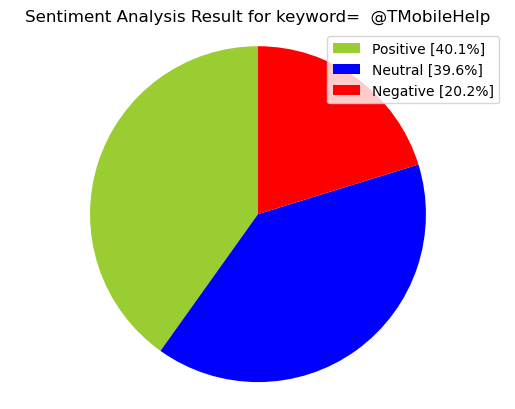

In [55]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [56]:
tweet_list2=tweet_list.drop_duplicates(inplace = True) #TWEET_LIST2 ?????

In [57]:
#text_all = tweet_list[0].values text_neutral = neutral_list[0].values text_positive = positive_list[0].values text_negative = negative_list[0].values
tw_list = pd.DataFrame(tweet_list)
#tw_list["text"] = tw_list[0]
tw_list

,0
0,@TMobileHelp I sent you like 5 DMs and you are...
1,@TMobileHelp @Mike_Katz No i have verizon not ...
2,@CallieField @TMobileHelp Thank you all for st...
3,. @TMobile @TMobileHelp @spint what a terrible...
4,"@TMobileHelp Thanks, it needed to be handled b..."
...,...
2402,@TMobileHelp @TMobile can you help another way...
2403,@TMobileHelp The guy helping is like 10 minute...
2404,RT @forgotten: @TMobile is at it again! Have t...
2467,@TMobileHelp https://t.co/Ljcvl758X6


In [58]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@TMobileHelp I sent you like 5 DMs and you are...,i sent you like 5 dms and you are ghosting m...
1,@TMobileHelp @Mike_Katz No i have verizon not ...,katz no i have verizon not t mobile haha
2,@CallieField @TMobileHelp Thank you all for st...,thank you all for stepping up and in fin...
3,. @TMobile @TMobileHelp @spint what a terrible...,what a terrible weekend dealing with s...
4,"@TMobileHelp Thanks, it needed to be handled b...",thanks it needed to be handled by phone
5,@TMobileHelp I'm still waiting in the DM 🤷,i m still waiting in the dm
6,@TMobile @TMobileHelp I’m having a major issue...,i m having a major issue on hold well ove...
7,"@TMobileHelp Thank you, but I got my issue res...",thank you but i got my issue resolved my c...
8,@TMobileHelp @MikeSievert To make the bill che...,to make the bill cheaper would make my pla...
9,@MikeSievert @TMobileHelp These are facts. Ver...,these are facts verizon was not what was ...


In [59]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@TMobileHelp I sent you like 5 DMs and you are...,i sent you like 5 dms and you are ghosting m...,0.10000,0.10,positive,0.000,0.773,0.227,0.6124
1,@TMobileHelp @Mike_Katz No i have verizon not ...,katz no i have verizon not t mobile haha,0.20000,0.30,negative,0.483,0.517,0.000,-0.5690
2,@CallieField @TMobileHelp Thank you all for st...,thank you all for stepping up and in fin...,0.00000,1.00,positive,0.000,0.857,0.143,0.3612
3,. @TMobile @TMobileHelp @spint what a terrible...,what a terrible weekend dealing with s...,-1.00000,1.00,negative,0.237,0.763,0.000,-0.4767
4,"@TMobileHelp Thanks, it needed to be handled b...",thanks it needed to be handled by phone,0.20000,0.20,positive,0.000,0.707,0.293,0.4404
5,@TMobileHelp I'm still waiting in the DM 🤷,i m still waiting in the dm,0.00000,0.00,neutral,0.000,1.000,0.000,0.0000
6,@TMobile @TMobileHelp I’m having a major issue...,i m having a major issue on hold well ove...,0.03125,0.25,negative,0.120,0.765,0.115,-0.0258
7,"@TMobileHelp Thank you, but I got my issue res...",thank you but i got my issue resolved my c...,0.00000,0.00,positive,0.000,0.808,0.192,0.4215
8,@TMobileHelp @MikeSievert To make the bill che...,to make the bill cheaper would make my pla...,0.00000,0.00,negative,0.153,0.847,0.000,-0.4404
9,@MikeSievert @TMobileHelp These are facts. Ver...,these are facts verizon was not what was ...,0.00000,0.00,negative,0.131,0.869,0.000,-0.2755


In [60]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [61]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [62]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,1034,44.04
neutral,811,34.54
negative,503,21.42


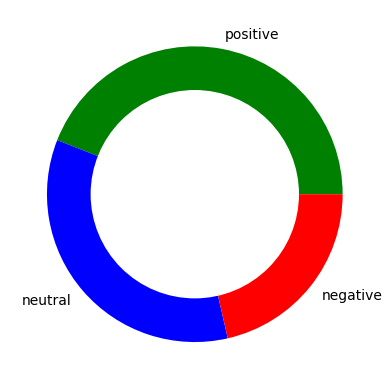

In [63]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [64]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


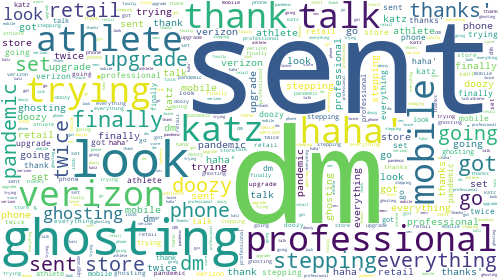

In [65]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


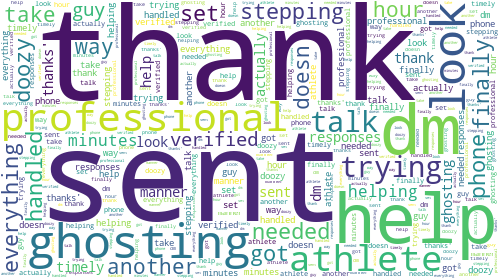

In [66]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


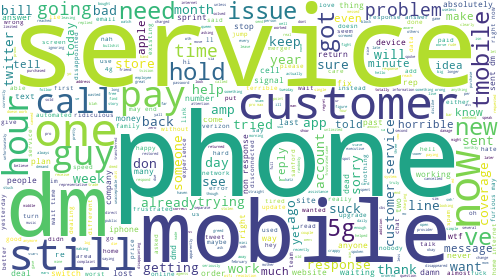

In [67]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


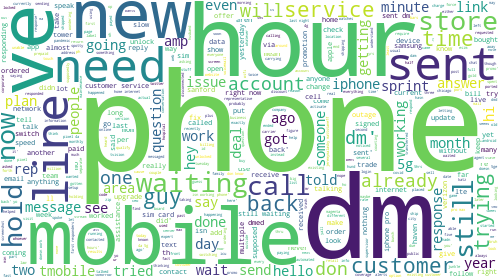

In [68]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [69]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [70]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,83.63
neutral,59.98
positive,75.96


In [71]:

round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,15.83
neutral,11.36
positive,14.38


In [72]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [73]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [74]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [75]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [76]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [77]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@TMobileHelp I sent you like 5 DMs and you are...,i sent you like 5 dms and you are ghosting m...,0.1,0.1,positive,0.000,0.773,0.227,0.6124,112,23,i sent you like dms and you are ghosting me...,"[, i, sent, you, like, dms, and, you, are, gho...","[, sent, like, dms, ghosting, look, like, prof...","[, sent, like, dm, ghost, look, like, professi..."
1,@TMobileHelp @Mike_Katz No i have verizon not ...,katz no i have verizon not t mobile haha,0.2,0.3,negative,0.483,0.517,0.000,-0.5690,44,9,katz no i have verizon not t mobile haha,"[, katz, no, i, have, verizon, not, t, mobile,...","[, katz, verizon, mobile, haha]","[, katz, verizon, mobil, haha]"
2,@CallieField @TMobileHelp Thank you all for st...,thank you all for stepping up and in fin...,0.0,1.0,positive,0.000,0.857,0.143,0.3612,92,17,thank you all for stepping up and in fin...,"[, thank, you, all, for, stepping, up, and, in...","[, thank, stepping, finally, got, everything, ...","[, thank, step, final, got, everyth, set, dooz..."
3,. @TMobile @TMobileHelp @spint what a terrible...,what a terrible weekend dealing with s...,-1.0,1.0,negative,0.237,0.763,0.000,-0.4767,95,15,what a terrible weekend dealing with s...,"[, what, a, terrible, weekend, dealing, with, ...","[, terrible, weekend, dealing, sprint, mobile,...","[, terribl, weekend, deal, sprint, mobil, spri..."
4,"@TMobileHelp Thanks, it needed to be handled b...",thanks it needed to be handled by phone,0.2,0.2,positive,0.000,0.707,0.293,0.4404,43,8,thanks it needed to be handled by phone,"[, thanks, it, needed, to, be, handled, by, ph...","[, thanks, needed, handled, phone, ]","[, thank, need, handl, phone, ]"


In [78]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

2348 Number of reviews has 2461 words


In [79]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aal,abandon,abil,abl,abo,absent,absolut,abunch,abus,...,yike,yo,youtub,yr,yup,z,za,zero,zip,zone
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
dm,286
help,256
phone,248
get,241
thank,218
servic,174
custom,169
mobil,164
sent,140
need,139


In [81]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [89]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list_positive['text'],(2,2),20)

n2_bigrams

[('need help', 33),
 ('sent dm', 31),
 ('free line', 29),
 ('customer service', 26),
 ('line promo', 14),
 ('help unlock', 12),
 ('home internet', 12),
 ('add free', 9),
 ('mobile help', 9),
 ('samsung a71', 9),
 ('iphone 12', 9),
 ('12 pro', 9),
 ('dm sent', 9),
 ('new line', 8),
 ('let know', 8),
 ('add line', 8),
 ('check dm', 8),
 ('hour ago', 7),
 ('help unlocking', 7),
 ('make sure', 7)]

In [88]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list_negative['text'],(3,3),20)

n3_trigrams

[('dmd sent non', 7),
 ('sent non response', 7),
 ('non response answer', 7),
 ('response answer return', 7),
 ('answer return furious', 7),
 ('return furious end', 6),
 ('just did frustrated', 3),
 ('did frustrated came', 3),
 ('frustrated came twitter', 3),
 ('12 pro max', 3),
 ('terrible weekend dealing', 2),
 ('weekend dealing sprint', 2),
 ('need pay past', 2),
 ('pay past service', 2),
 ('past service restored', 2),
 ('service restored erroneously', 2),
 ('restored erroneously suspended', 2),
 ('erroneously suspended online', 2),
 ('totally disappointed tmobile', 2),
 ('sent dm hours', 2)]

In [84]:
nrc = "datax/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
count=0
emotion_dict=dict()
with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count+=1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]

In [85]:
def get_nrc_data():
    nrc = "datax/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [86]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [87]:
emotion_analyzer(str(tw_list["text"].values))

{'sadness': 0.011764705882352941,
 'joy': 0.011764705882352941,
 'disgust': 0.011764705882352941,
 'surprise': 0.011764705882352941,
 'negative': 0.011764705882352941,
 'trust': 0.023529411764705882,
 'positive': 0.058823529411764705,
 'anticipation': 0.03529411764705882,
 'fear': 0.011764705882352941,
 'anger': 0}